# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set default font to DejaVu Sans
rcParams['font.sans-serif'] = ['DejaVu Sans']

In [6]:
import pandas as pd 
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LassoCV, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import friedmanchisquare
from sklearn.model_selection import KFold


# Importing the data

In [4]:
df_imputed = pd.read_csv('imputed.csv')

In [5]:
df_imputed.drop(['Unnamed: 0'],axis=1, inplace=True)

# Defining the sleep features

In [3]:
categorical_features=['Participant','Gender']

sleep_features= ['total_sleep_time', 'percent_time_asleep', 'waso',
       'sleep_onset_latency', 'number_wake_bouts', 'stage_0_count',
       'stage_1_count', 'stage_2_count', 'stage_3_count', 'stage_5_count']
other_features=['HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G',
       'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G',
       'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G',
       'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G',
       'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G',
       'BVP_Q3G', 'PeakEDA', 'maxHRV', 'minHRV', 'medianHRV', 'SDNN', 'NN50',
       'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'Minfrommid', 'Hourfrommid',
       'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min',
       'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical',
       'ACC_Std_Historical', 'Activity_Bouts', 'Activity24',
       'Activity1h']
numeric_features=sleep_features+other_features

In [4]:
all_features=numeric_features+categorical_features

# One-hot encoding for categorical features

In [5]:
for categories in categorical_features:
    one_hot = pd.get_dummies(df_imputed[categories])
    df_imputed = df_imputed.drop(categories,axis = 1)
    df_imputed = df_imputed.join(one_hot)

NameError: name 'pd' is not defined

In [9]:
df_imputed 

,IG,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,EDA_Std,...,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,FEMALE,MALE
0,97.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,0.334533,0.015065,...,0,0,0,0,0,0,0,1,0,1
1,95.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,0.394727,0.018376,...,0,0,0,0,0,0,0,1,0,1
2,92.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,0.458762,0.018286,...,0,0,0,0,0,0,0,1,0,1
3,89.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,1.456508,0.069042,...,0,0,0,0,0,0,0,1,0,1
4,90.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,5.904090,1.911557,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,181.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,0.566582,0.004439,...,0,0,0,0,0,0,0,0,0,1
21761,177.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,0.538398,0.005217,...,0,0,0,0,0,0,0,0,0,1
21762,171.0,84.667375,87.22,1.835218,-0.553606,83.805195,85.447387,0.511280,0.866359,0.016711,...,0,0,0,0,0,0,0,0,0,1
21763,166.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,0.516619,0.003153,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df_imputed.columns = df_imputed.columns.astype(str)

# Correlation with the output label

In [11]:
from scipy.stats import pearsonr, spearmanr, shapiro
#wake = 0, N1 = 1, N2 = 2, N3 = 3, REM = 5
df_imputed.rename(columns={"stage_0_count": "Wake-Epochs",
                           "stage_1_count": "N1-Epochs",
                           "stage_2_count": "N2-Epochs",
                           "stage_3_count": "N3-Epochs",
                           "stage_5_count": "REM-Epochs",
                           
                           
                          }, inplace=True)
sleep_features= ['total_sleep_time', 'percent_time_asleep', 'waso',
       'sleep_onset_latency', 'number_wake_bouts', 'Wake-Epochs',
       'N1-Epochs', 'N2-Epochs', 'N3-Epochs', 'REM-Epochs']

In [25]:
for feature in sleep_features:
    t,p=shapiro(df_imputed[feature])
    print(f'feature {feature}, statistic :{t}, p-value {p}')

feature total_sleep_time, statistic :0.16647129545713535, p-value 4.634136344187485e-133
feature percent_time_asleep, statistic :0.21506196164043834, p-value 2.559655248960585e-131
feature waso, statistic :0.9815062164057954, p-value 1.2769832000200333e-45
feature sleep_onset_latency, statistic :0.6810352140649774, p-value 1.3583778545045352e-106
feature number_wake_bouts, statistic :0.9886423892278756, p-value 8.447395994674483e-38
feature Wake-Epochs, statistic :0.21927846907056514, p-value 3.6630886630397406e-131
feature N1-Epochs, statistic :0.21927846908016102, p-value 3.663088666034845e-131
feature N2-Epochs, statistic :0.2192784690873374, p-value 3.663088668275125e-131
feature N3-Epochs, statistic :0.21927846907725423, p-value 3.663088665127554e-131
feature REM-Epochs, statistic :0.21927846921794103, p-value 3.663088709041506e-131


/dev/shm/jobs/48990284/ipykernel_159656/2232542779.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  t,p=shapiro(df_imputed[feature])


In [14]:
for feature in sleep_features:
    t,p=pearsonr(df_imputed[feature], df_imputed['IG'])
    t1,p1=spearmanr(df_imputed[feature], df_imputed['IG'])
    print(f'Pearson feature {feature} , statistic : {t}, p-value : {p}\n')
    print(f'Spearman feature {feature} , statistic : {t1}, p-value : {p1}\n')

Pearson feature total_sleep_time , statistic : 0.04475665033567256, p-value : 3.952050805090189e-11

Spearman feature total_sleep_time , statistic : 0.11615878664834871, p-value : 2.9392938642814947e-66

Pearson feature percent_time_asleep , statistic : 0.055255722098004396, p-value : 3.416852168745217e-16

Spearman feature percent_time_asleep , statistic : 0.1420935698335639, p-value : 1.538014498665707e-98

Pearson feature waso , statistic : -0.16865781064620058, p-value : 1.3476712194035945e-138

Spearman feature waso , statistic : -0.18008741501146575, p-value : 4.7071638727727095e-158

Pearson feature sleep_onset_latency , statistic : 0.06427416590006113, p-value : 2.274802895144003e-21

Spearman feature sleep_onset_latency , statistic : 0.07141979285674949, p-value : 5.1119702679365163e-26

Pearson feature number_wake_bouts , statistic : -0.07836717609929313, p-value : 5.288569024280143e-31

Spearman feature number_wake_bouts , statistic : -0.12169962314144171, p-value : 1.350408

In [13]:
t_values = []
p_values = []
for feature in sleep_features:
    if 'w' in feature:
        t, p = pearsonr(df_imputed[feature], df_imputed['IG'])
    else:
        t, p = spearmanr(df_imputed[feature], df_imputed['IG'])
        
    
    t_values.append(t)
    p_values.append(p)


In [14]:
plot_data = pd.DataFrame({
    'Feature': sleep_features,
    't-statistic': t_values,
    'p-value': p_values
})

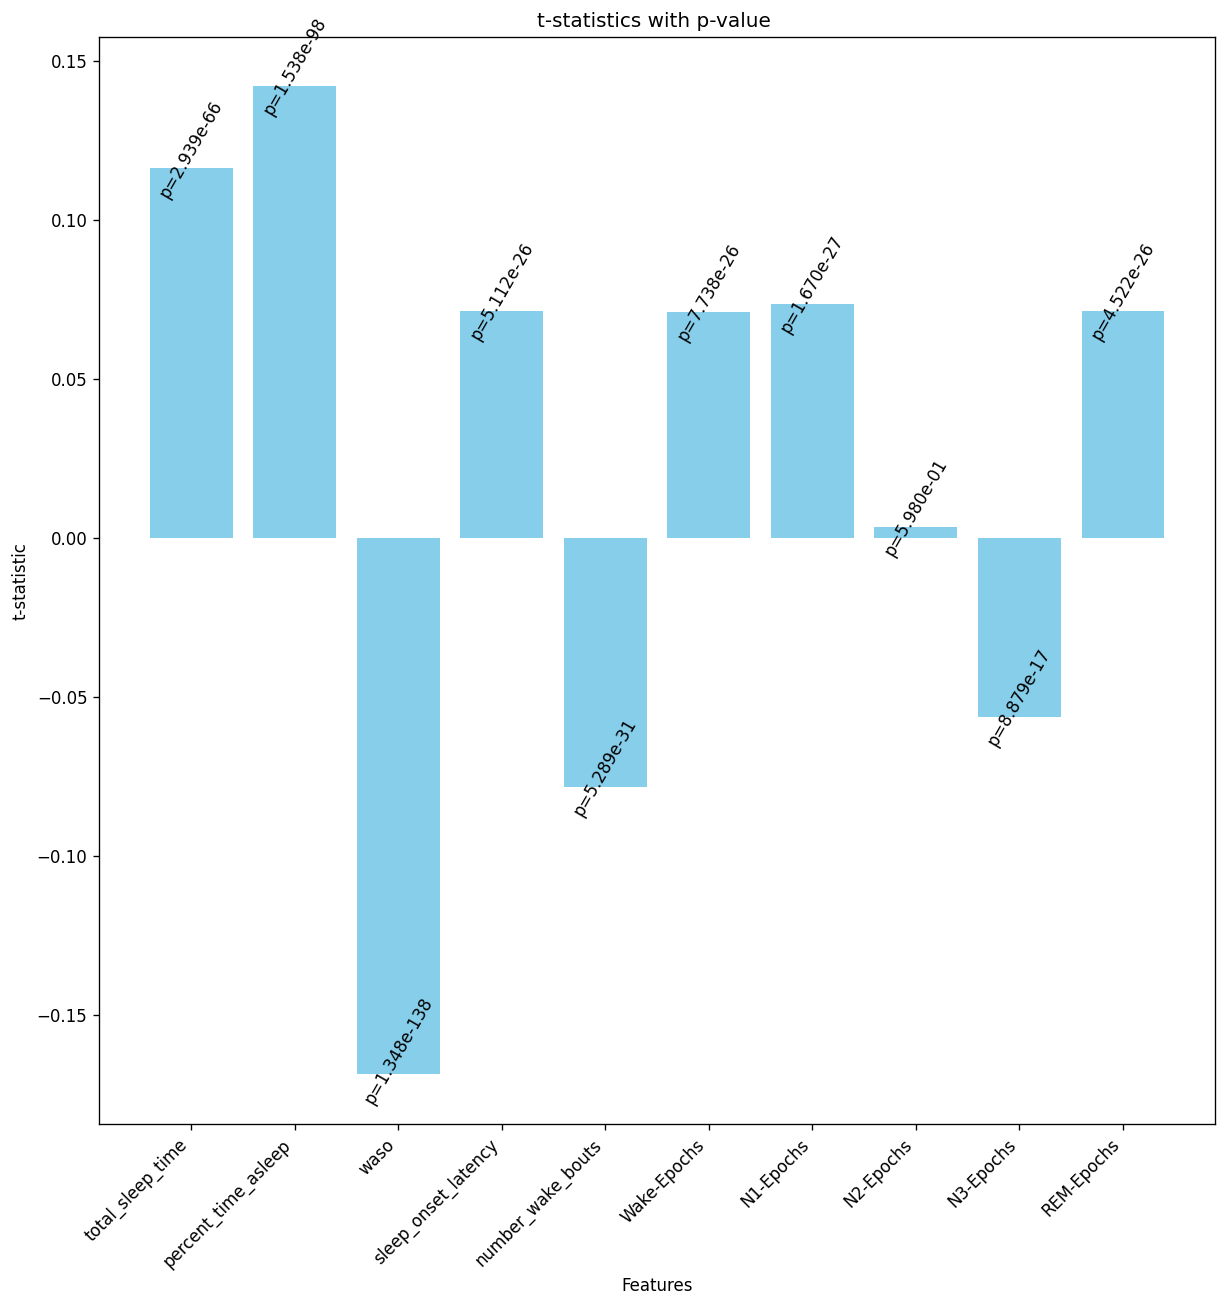

In [15]:
# Plotting
plt.figure(figsize=(12, 12), dpi=120)
bars = plt.bar(plot_data['Feature'], plot_data['t-statistic'], color='skyblue')

# Add p-value annotations
for bar, p in zip(bars, plot_data['p-value']):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval-0.01,  # Adjust the y-position if necessary
        f'p={p:.3e}',
        ha='center',
        va='bottom',
        rotation=60
    )

# Labels and title

plt.xlabel('Features')
plt.ylabel('t-statistic')
plt.title('t-statistics with p-value ')
plt.xticks(rotation=45, ha='right')
plt.savefig('pearson_correlation_initial_.tiff')

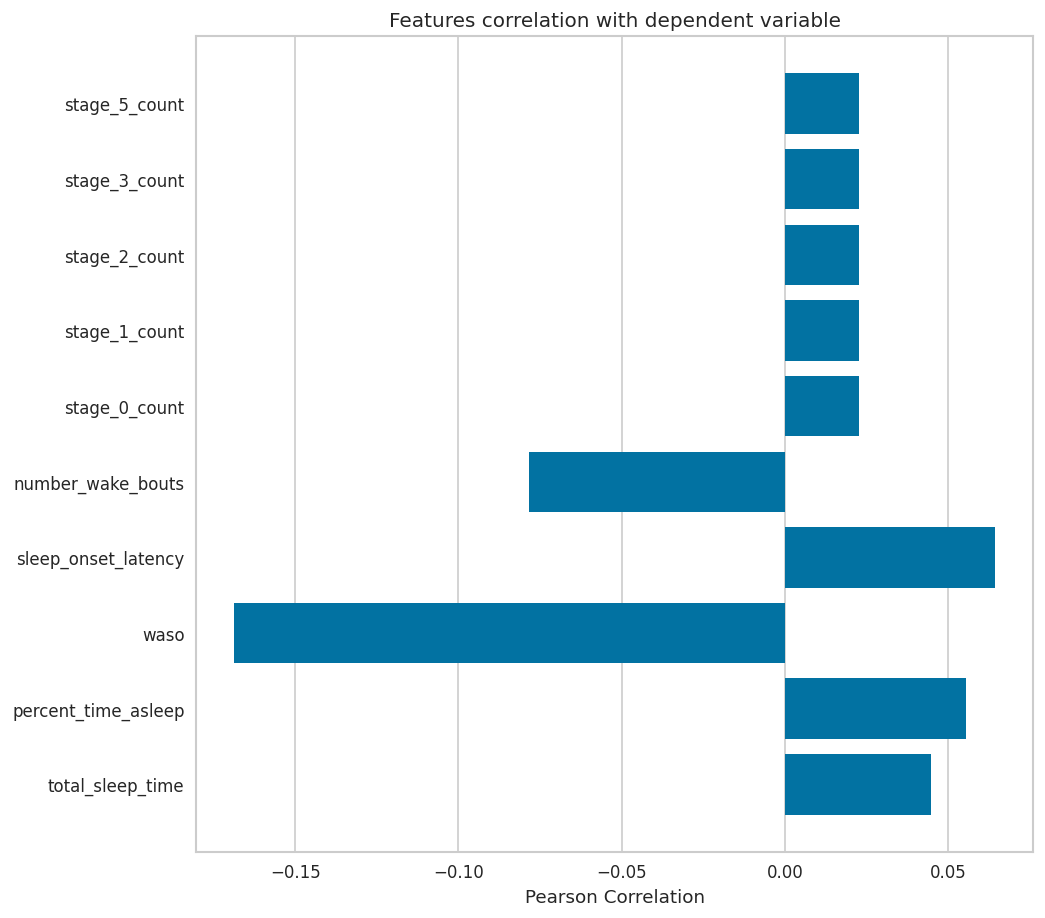

In [14]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(9, 7), dpi=120)
visualizer = FeatureCorrelation(labels=sleep_features)
visualizer.fit(df_imputed[sleep_features], df_imputed['IG'])
visualizer.show(outpath="sleep_feature_correlation_initial.tiff")
plt.show()

/home/wsf4491/.local/Python-3.10-gimkl-2022a/lib/python3.10/site-packages/yellowbrick/target/feature_correlation.py:174: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  [pearsonr(x, y, **kwargs)[0] for x in np.asarray(X).T]


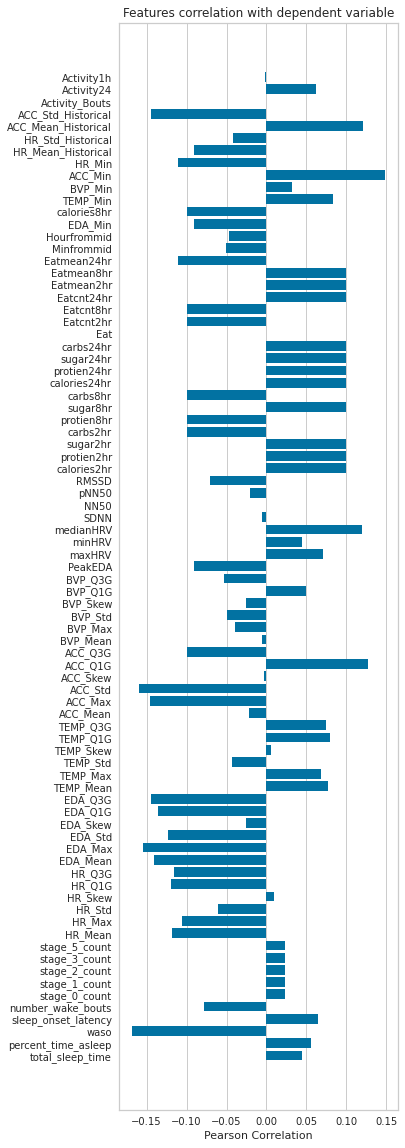

In [38]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(5, 20))
visualizer = FeatureCorrelation(labels=numeric_features)
visualizer.fit(df_imputed[numeric_features], df_imputed['IG'])
visualizer.show(outpath="sleep_feature_correlation_initial.svg")
plt.show()

 # Let us examine what is the reason for the less correlation of sleep stages on glucose

In [15]:

print("Total Data:",len(df_imputed))
print("Missing Data:",df_imputed.isnull().any(axis=1).sum())
print("Actual Instances of Data:",len(df_imputed)-df_imputed.isnull().any(axis=1).sum())
df_imputed=df_imputed.dropna()

Total Data: 21489
Missing Data: 2618
Actual Instances of Data: 18871



Processing waso


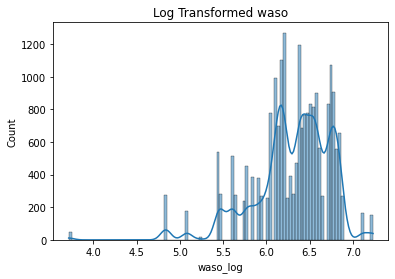

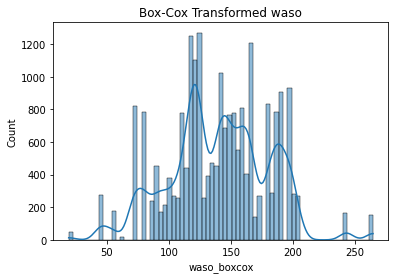

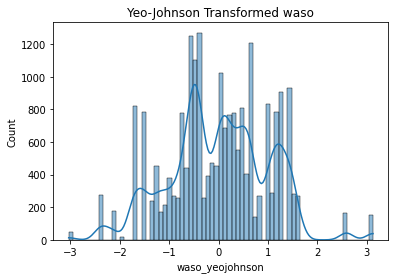

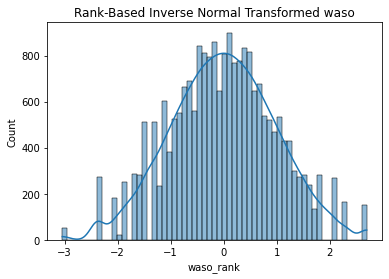

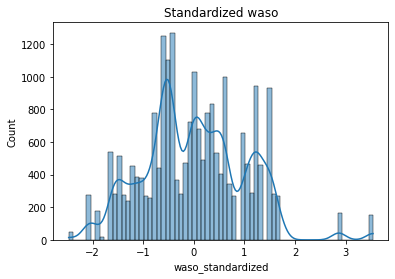

/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:52: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:53: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_log = shapiro(df[f'{feature}_log'])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:54: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_boxcox = shapiro(df[f'{feature}_boxcox'])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:55: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_yeojohnson = shapiro(df[f'{feature}_yeojohnson'])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:56: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not b

Original: p-value = 1.2769832000200333e-45
Log: p-value = 1.563705888693757e-71
Box-Cox: p-value = 3.4986577223858367e-38
Yeo-Johnson: p-value = 3.498657401364864e-38
Rank-Based Inverse Normal: p-value = 7.751920188590613e-15
Standardized: p-value = 1.2769832000200333e-45

Processing number_wake_bouts


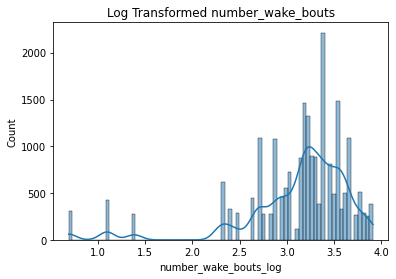

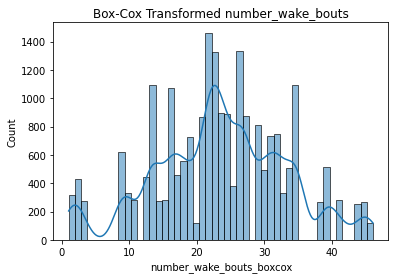

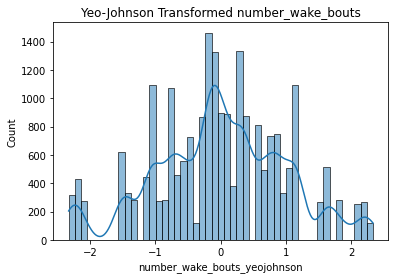

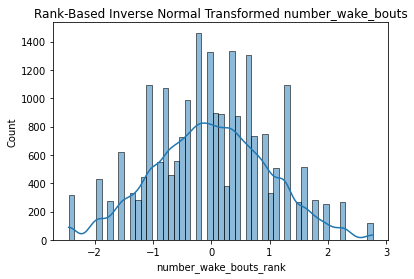

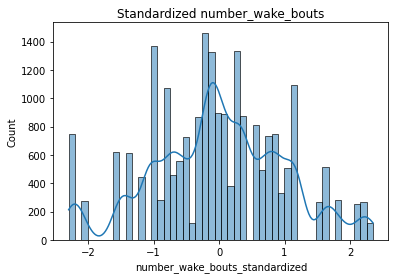

Original: p-value = 8.447395994674483e-38
Log: p-value = 2.9532676540107213e-94
Box-Cox: p-value = 3.5462453997868945e-38
Yeo-Johnson: p-value = 3.5462526977767774e-38
Rank-Based Inverse Normal: p-value = 1.4598946897906064e-24
Standardized: p-value = 8.447395994668685e-38


/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:52: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:53: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_log = shapiro(df[f'{feature}_log'])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:54: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_boxcox = shapiro(df[f'{feature}_boxcox'])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:55: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21765.
  _, p_value_yeojohnson = shapiro(df[f'{feature}_yeojohnson'])
/dev/shm/jobs/48990909/ipykernel_179571/3314880534.py:56: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not b

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, shapiro, rankdata, norm
from sklearn.preprocessing import PowerTransformer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features are updated
df = df_imputed

# Features to transform
features_to_transform = ['waso', 'number_wake_bouts']

for feature in features_to_transform:
    print(f'\nProcessing {feature}')
    
    # Log Transformation
    df[f'{feature}_log'] = np.log(df[feature] + 1)
    sns.histplot(df[f'{feature}_log'], kde=True)
    plt.title(f'Log Transformed {feature}')
    plt.show()
    
    # Box-Cox Transformation
    # Box-Cox requires positive values, so add a constant to ensure positivity
    df[f'{feature}_boxcox'], _ = boxcox(df[feature] + 1)
    sns.histplot(df[f'{feature}_boxcox'], kde=True)
    plt.title(f'Box-Cox Transformed {feature}')
    plt.show()
    
    # Yeo-Johnson Transformation
    pt = PowerTransformer(method='yeo-johnson')
    df[f'{feature}_yeojohnson'] = pt.fit_transform(df[[feature]])
    sns.histplot(df[f'{feature}_yeojohnson'], kde=True)
    plt.title(f'Yeo-Johnson Transformed {feature}')
    plt.show()
    
    # Rank-Based Inverse Normal Transformation
    ranks = rankdata(df[feature])
    df[f'{feature}_rank'] = norm.ppf((ranks - 0.5) / len(ranks))
    sns.histplot(df[f'{feature}_rank'], kde=True)
    plt.title(f'Rank-Based Inverse Normal Transformed {feature}')
    plt.show()
    
    # Standardization
    scaler = StandardScaler()
    df[f'{feature}_standardized'] = scaler.fit_transform(df[[feature]])
    sns.histplot(df[f'{feature}_standardized'], kde=True)
    plt.title(f'Standardized {feature}')
    plt.show()
    
    # Re-evaluate normality using Shapiro-Wilk test
    _, p_value_original = shapiro(df[feature])
    _, p_value_log = shapiro(df[f'{feature}_log'])
    _, p_value_boxcox = shapiro(df[f'{feature}_boxcox'])
    _, p_value_yeojohnson = shapiro(df[f'{feature}_yeojohnson'])
    _, p_value_rank = shapiro(df[f'{feature}_rank'])
    _, p_value_standardized = shapiro(df[f'{feature}_standardized'])
    
    print(f'Original: p-value = {p_value_original}')
    print(f'Log: p-value = {p_value_log}')
    print(f'Box-Cox: p-value = {p_value_boxcox}')
    print(f'Yeo-Johnson: p-value = {p_value_yeojohnson}')
    print(f'Rank-Based Inverse Normal: p-value = {p_value_rank}')
    print(f'Standardized: p-value = {p_value_standardized}')



Processing total_sleep_time


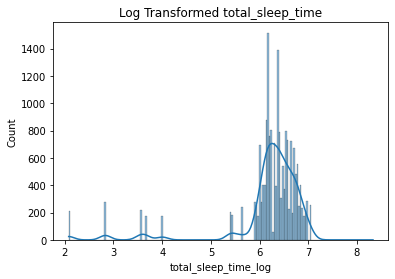

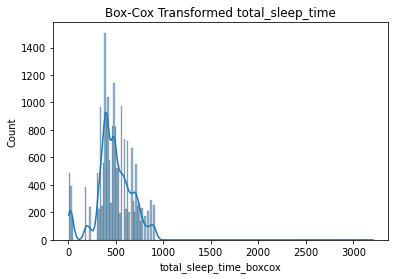

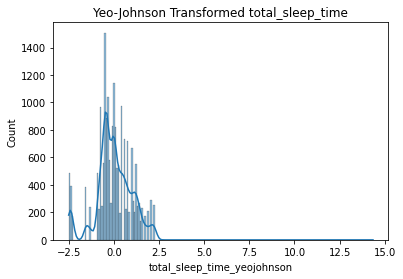

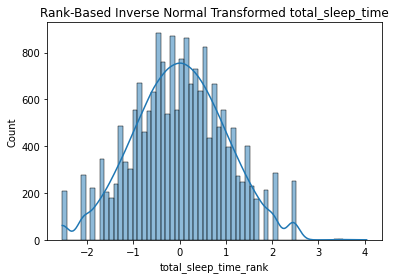

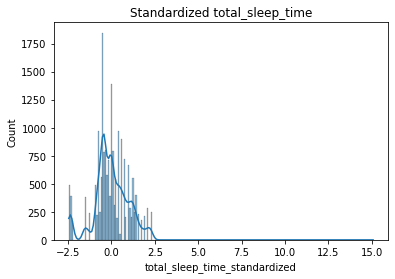

Original: Statistic = 13.0482, p-value = 6.5081e-39
Log: Statistic = -95.1900, p-value = 0.0000e+00
Box-Cox: Statistic = 6.4056, p-value = 1.4980e-10
Yeo-Johnson: Statistic = 6.4056, p-value = 1.4980e-10
Rank-Based Inverse Normal: Statistic = 0.2834, p-value = 7.7688e-01
Standardized: Statistic = 13.0482, p-value = 6.5081e-39

Processing percent_time_asleep


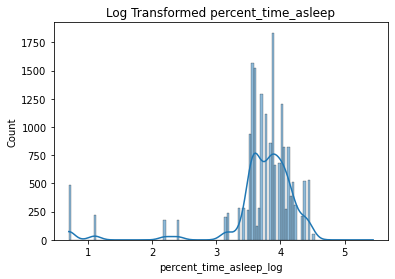

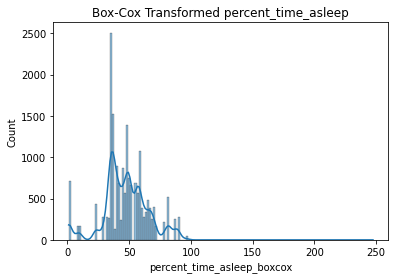

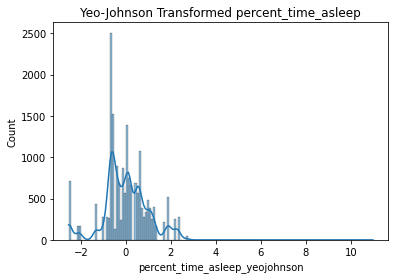

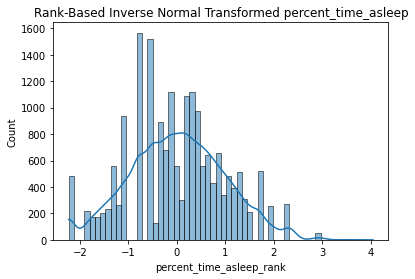

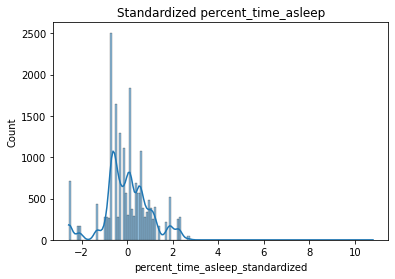

Original: Statistic = 2.9686, p-value = 2.9915e-03
Log: Statistic = -93.7675, p-value = 0.0000e+00
Box-Cox: Statistic = 5.0963, p-value = 3.4633e-07
Yeo-Johnson: Statistic = 5.0963, p-value = 3.4634e-07
Rank-Based Inverse Normal: Statistic = 2.4103, p-value = 1.5938e-02
Standardized: Statistic = 2.9686, p-value = 2.9915e-03

Processing waso


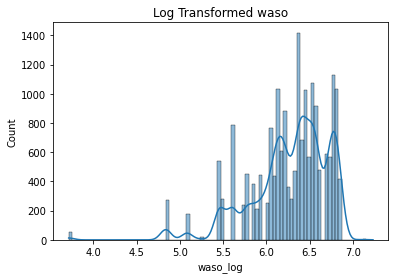

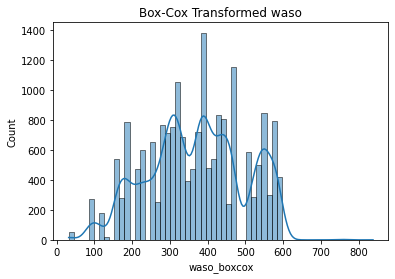

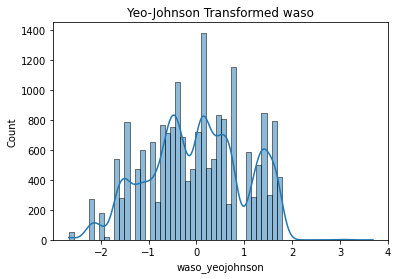

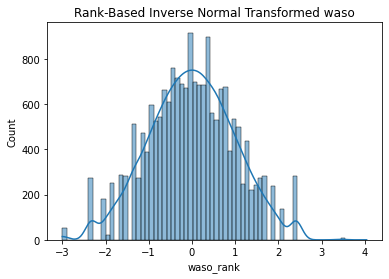

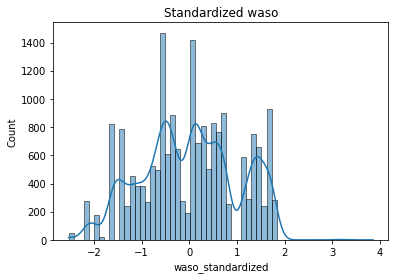

Original: Statistic = -1.7754, p-value = 7.5825e-02
Log: Statistic = -57.1623, p-value = 0.0000e+00
Box-Cox: Statistic = -5.4803, p-value = 4.2461e-08
Yeo-Johnson: Statistic = -5.4803, p-value = 4.2461e-08
Rank-Based Inverse Normal: Statistic = -0.3438, p-value = 7.3102e-01
Standardized: Statistic = -1.7754, p-value = 7.5825e-02

Processing sleep_onset_latency


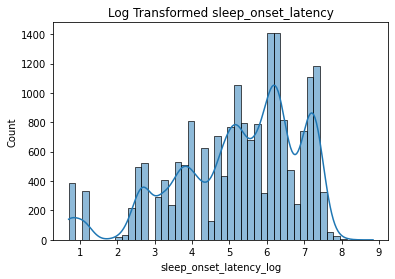

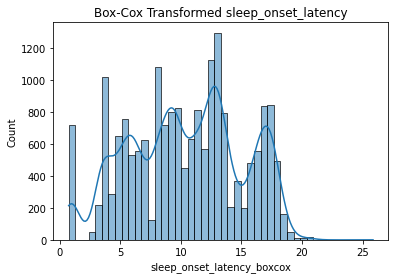

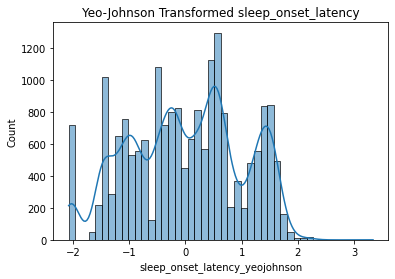

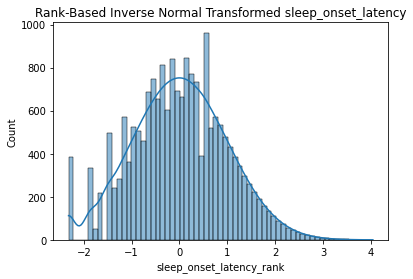

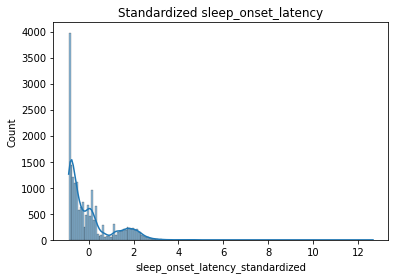

Original: Statistic = 60.1802, p-value = 0.0000e+00
Log: Statistic = -38.1698, p-value = 0.0000e+00
Box-Cox: Statistic = -5.8324, p-value = 5.4633e-09
Yeo-Johnson: Statistic = -5.8324, p-value = 5.4632e-09
Rank-Based Inverse Normal: Statistic = 2.6623, p-value = 7.7602e-03
Standardized: Statistic = 60.1802, p-value = 0.0000e+00

Processing number_wake_bouts


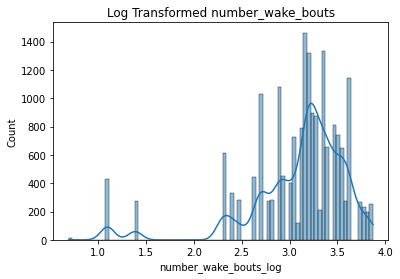

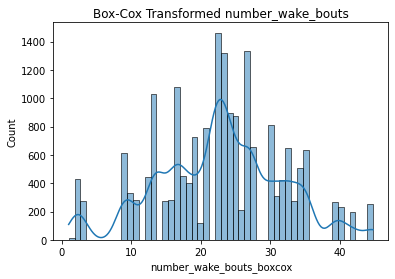

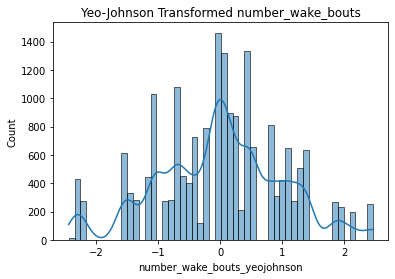

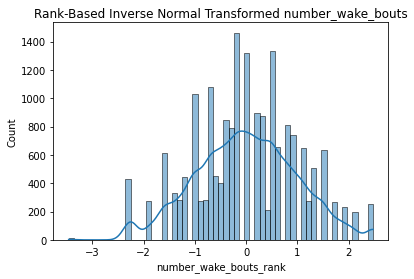

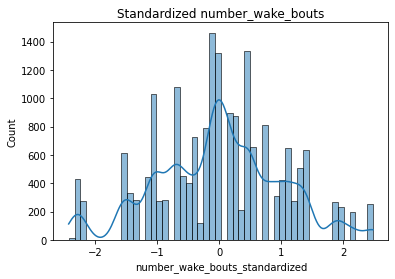

Original: Statistic = -1.7598, p-value = 7.8447e-02
Log: Statistic = -71.9426, p-value = 0.0000e+00
Box-Cox: Statistic = -2.9403, p-value = 3.2787e-03
Yeo-Johnson: Statistic = -2.9403, p-value = 3.2787e-03
Rank-Based Inverse Normal: Statistic = 0.4540, p-value = 6.4980e-01
Standardized: Statistic = -1.7598, p-value = 7.8447e-02

Processing Wake-Epochs


/home/wsf4491/.local/Python-3.10-gimkl-2022a/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


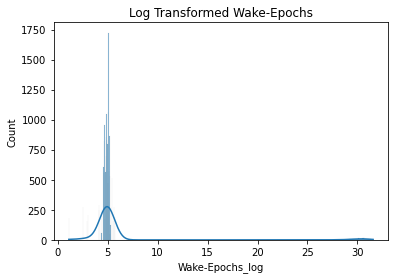

ValueError: Data must be positive.

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, shapiro, rankdata, norm,skewtest
from sklearn.preprocessing import PowerTransformer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features are updated
df = df_imputed

# List of features to transform
sleep_features = ['total_sleep_time', 'percent_time_asleep', 'waso',
                   'sleep_onset_latency', 'number_wake_bouts', 'Wake-Epochs',
                   'N1-Epochs', 'N2-Epochs', 'N3-Epochs', 'REM-Epochs']

# Apply transformations and visualize for each feature
for feature in sleep_features:
    print(f'\nProcessing {feature}')
    
    # Log Transformation
    df[f'{feature}_log'] = np.log(df[feature] + 1)
    sns.histplot(df[f'{feature}_log'], kde=True)
    plt.title(f'Log Transformed {feature}')
    plt.show()
    
    # Box-Cox Transformation
    df[f'{feature}_boxcox'], _ = boxcox(df[feature] + 1)
    sns.histplot(df[f'{feature}_boxcox'], kde=True)
    plt.title(f'Box-Cox Transformed {feature}')
    plt.show()
    
    # Yeo-Johnson Transformation
    pt = PowerTransformer(method='yeo-johnson')
    df[f'{feature}_yeojohnson'] = pt.fit_transform(df[[feature]])
    sns.histplot(df[f'{feature}_yeojohnson'], kde=True)
    plt.title(f'Yeo-Johnson Transformed {feature}')
    plt.show()
    
    # Rank-Based Inverse Normal Transformation
    ranks = rankdata(df[feature])
    df[f'{feature}_rank'] = norm.ppf((ranks - 0.5) / len(ranks))
    sns.histplot(df[f'{feature}_rank'], kde=True)
    plt.title(f'Rank-Based Inverse Normal Transformed {feature}')
    plt.show()
    
    # Standardization
    scaler = StandardScaler()
    df[f'{feature}_standardized'] = scaler.fit_transform(df[[feature]])
    sns.histplot(df[f'{feature}_standardized'], kde=True)
    plt.title(f'Standardized {feature}')
    plt.show()
    from scipy.stats import skewtest

# Assuming df is your DataFrame and 'feature' is the column you are testing
    statistic_original, p_value_original = skewtest(df[feature])
    statistic_log, p_value_log = skewtest(df[f'{feature}_log'])
    statistic_boxcox, p_value_boxcox = skewtest(df[f'{feature}_boxcox'])
    statistic_yeojohnson, p_value_yeojohnson = skewtest(df[f'{feature}_yeojohnson'])
    statistic_rank, p_value_rank = skewtest(df[f'{feature}_rank'])
    statistic_standardized, p_value_standardized = skewtest(df[f'{feature}_standardized'])

    print(f'Original: Statistic = {statistic_original:.4f}, p-value = {p_value_original:.4e}')
    print(f'Log: Statistic = {statistic_log:.4f}, p-value = {p_value_log:.4e}')
    print(f'Box-Cox: Statistic = {statistic_boxcox:.4f}, p-value = {p_value_boxcox:.4e}')
    print(f'Yeo-Johnson: Statistic = {statistic_yeojohnson:.4f}, p-value = {p_value_yeojohnson:.4e}')
    print(f'Rank-Based Inverse Normal: Statistic = {statistic_rank:.4f}, p-value = {p_value_rank:.4e}')
    print(f'Standardized: Statistic = {statistic_standardized:.4f}, p-value = {p_value_standardized:.4e}')

    


In [43]:
sleep_features

['total_sleep_time',
 'percent_time_asleep',
 'waso',
 'sleep_onset_latency',
 'number_wake_bouts',
 'stage_0_count',
 'stage_1_count',
 'stage_2_count',
 'stage_3_count',
 'stage_5_count']

plotting for total_sleep_time


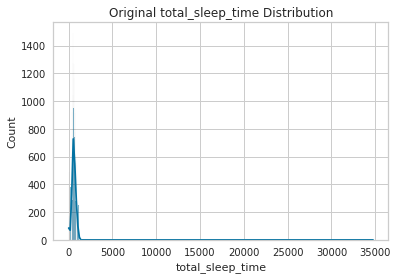

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'log'] = np.log(df[feature] + 1)


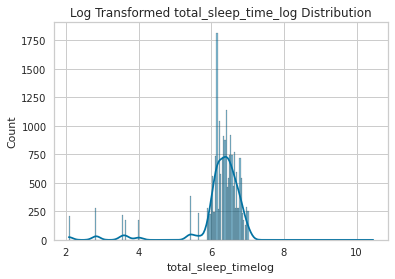

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


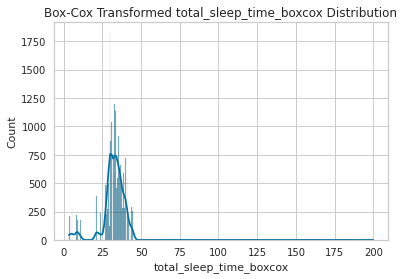

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 2.167556140963925e-100


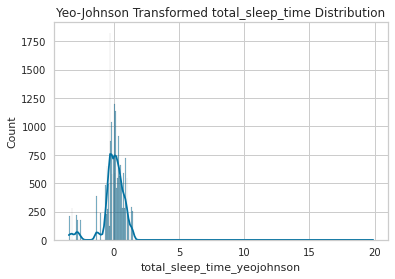

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


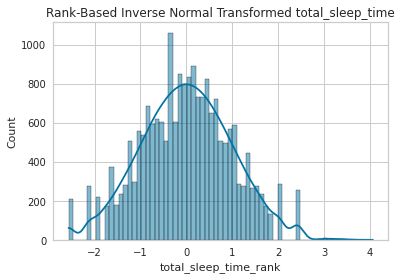

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])


Original: p-value = 3.767403656854233e-130
Log: p-value = 2.1140579382201115e-110
Yeo-Johnson: p-value = 2.1675553118503544e-100
Rank-Based Inverse Normal: p-value = 7.903490181552133e-16
Standardized: p-value = 9.862654666382586e-132
plotting for percent_time_asleep


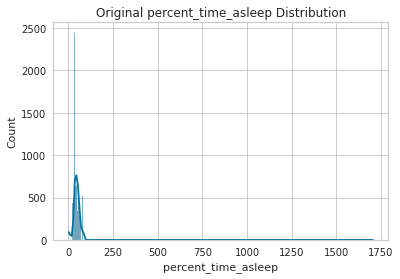

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'log'] = np.log(df[feature] + 1)


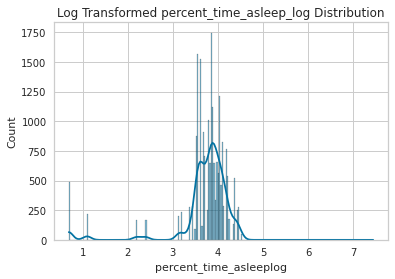

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


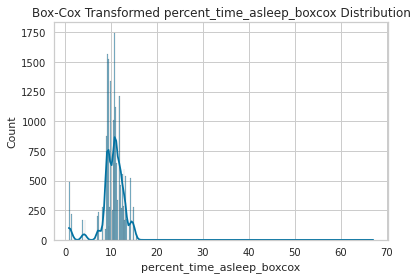

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 1.2538906207719774e-97


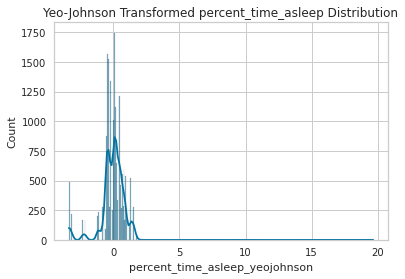

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


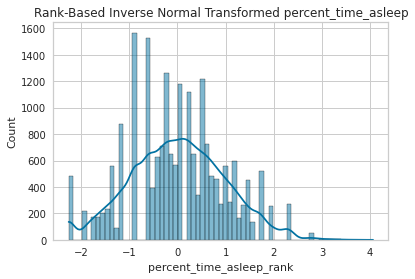

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])


Original: p-value = 2.42493552692525e-125
Log: p-value = 1.7346155326251268e-108
Yeo-Johnson: p-value = 1.2538906199600566e-97
Rank-Based Inverse Normal: p-value = 6.267270093041273e-26
Standardized: p-value = 9.862654666382586e-132
plotting for waso


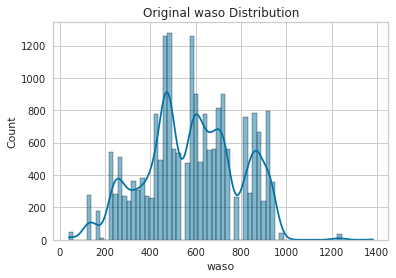

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'log'] = np.log(df[feature] + 1)


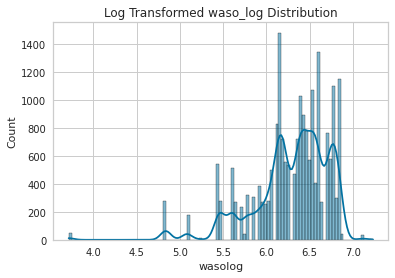

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


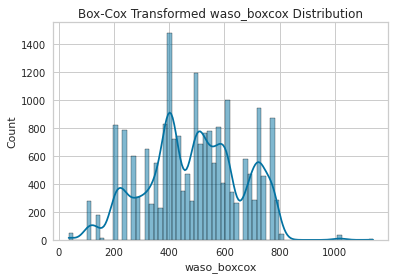

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 3.6994714258355685e-43


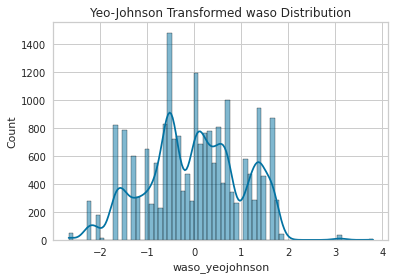

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


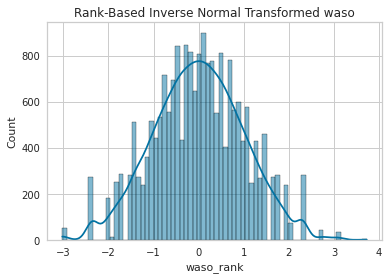

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])


Original: p-value = 3.457614031365877e-43
Log: p-value = 2.848382206786305e-76
Yeo-Johnson: p-value = 3.6994715188140655e-43
Rank-Based Inverse Normal: p-value = 9.70005605873897e-13
Standardized: p-value = 9.862654666382586e-132
plotting for sleep_onset_latency


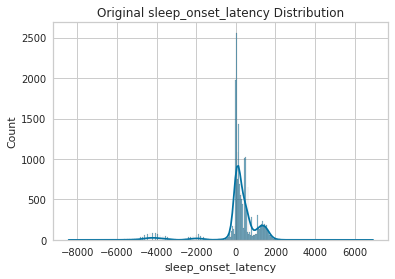

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


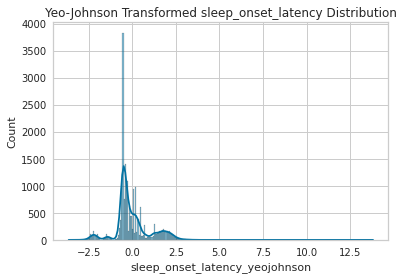

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


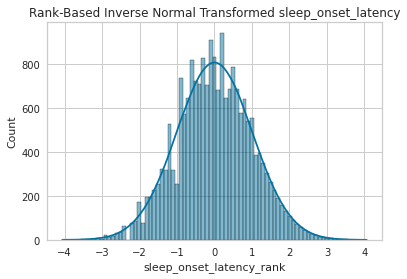

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])


Original: p-value = 7.096842218795273e-106
Log: p-value = 2.848382206786305e-76
Yeo-Johnson: p-value = 8.265149405916313e-80
Rank-Based Inverse Normal: p-value = 0.3344636691138421
Standardized: p-value = 9.862654666382586e-132
plotting for number_wake_bouts


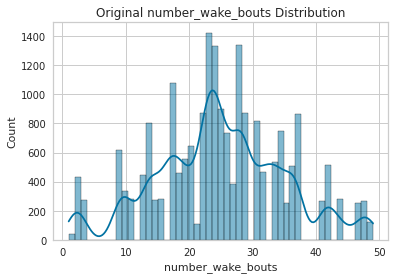

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'log'] = np.log(df[feature] + 1)


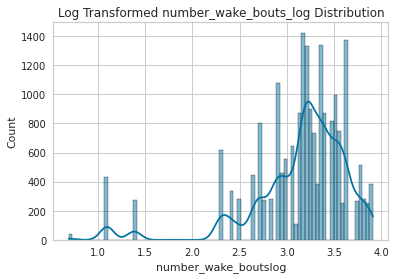

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


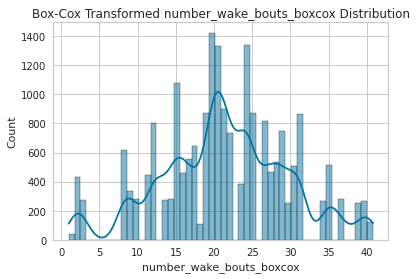

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 1.6472548471931394e-36


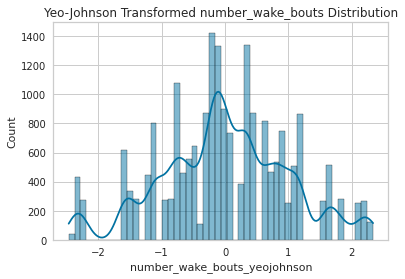

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


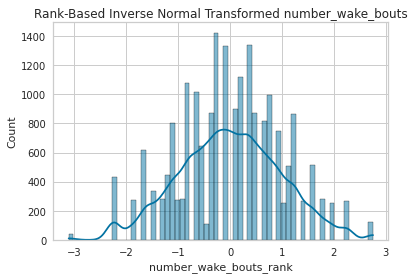

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'l

Original: p-value = 2.978068999376272e-36
Log: p-value = 5.888599530005541e-88
Yeo-Johnson: p-value = 1.6472581285917485e-36
Rank-Based Inverse Normal: p-value = 9.778578894933891e-23
Standardized: p-value = 9.862654666382586e-132


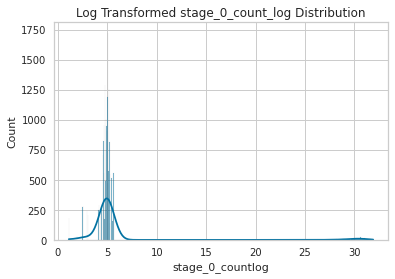

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


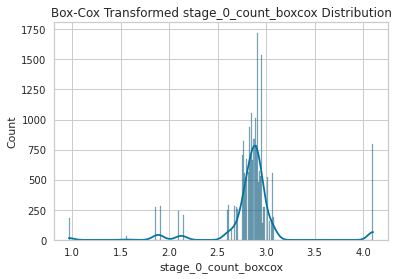

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 3.7942785414627155e-107


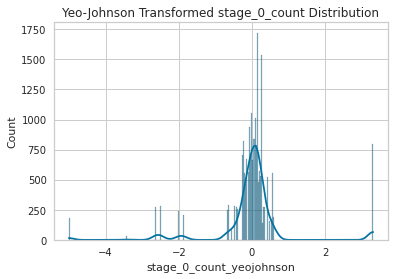

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


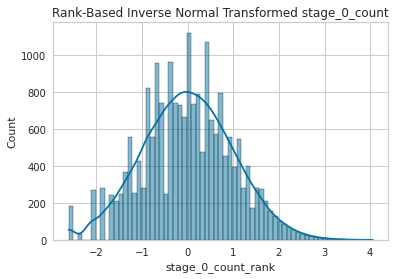

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'l

Original: p-value = 9.862654666382586e-132
Log: p-value = 1.802487715004275e-126
Yeo-Johnson: p-value = 3.794277946661852e-107
Rank-Based Inverse Normal: p-value = 4.0388098137140976e-13
Standardized: p-value = 9.862654666382586e-132


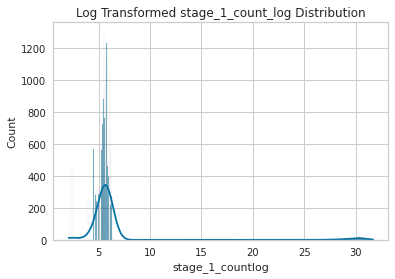

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


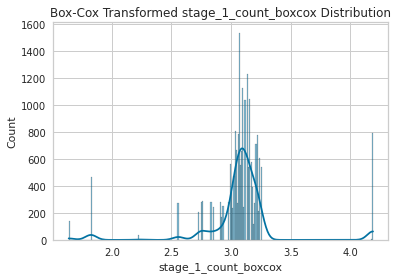

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 5.339010271047191e-106


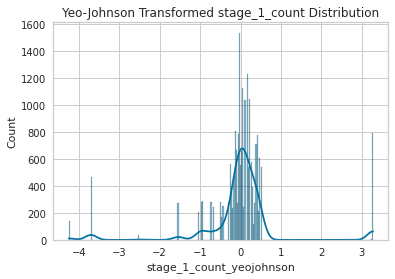

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


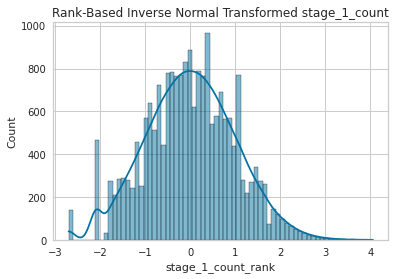

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'l

Original: p-value = 9.862654677165774e-132
Log: p-value = 4.9629072555621484e-126
Yeo-Johnson: p-value = 5.339011431360628e-106
Rank-Based Inverse Normal: p-value = 2.4012500359466153e-13
Standardized: p-value = 9.862654666382586e-132


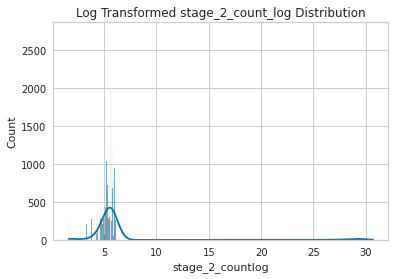

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


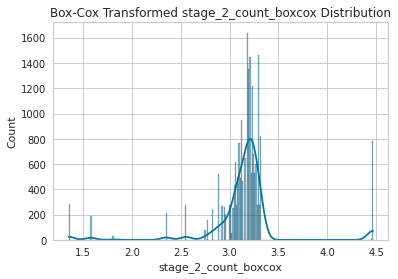

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 1.0231964245216171e-107


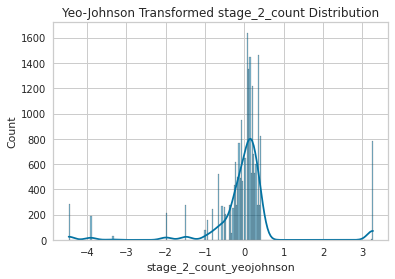

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


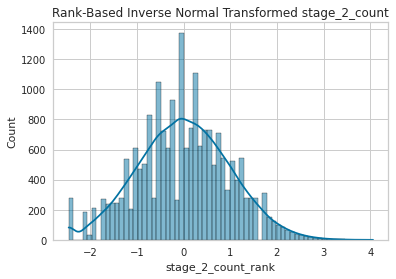

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'l

Original: p-value = 9.86265470395921e-132
Log: p-value = 9.69086649023158e-126
Yeo-Johnson: p-value = 1.0231962886830269e-107
Rank-Based Inverse Normal: p-value = 1.7899491449204804e-15
Standardized: p-value = 9.862654666382586e-132


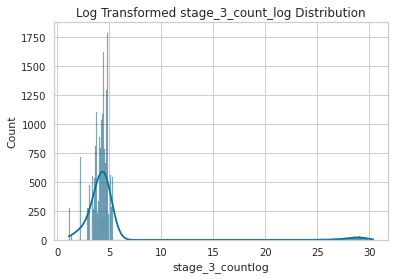

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


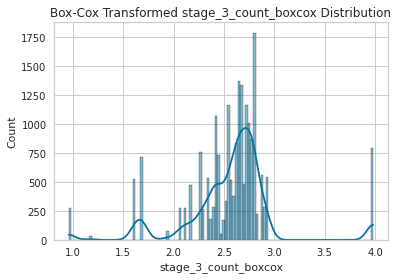

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 4.783187480261059e-88


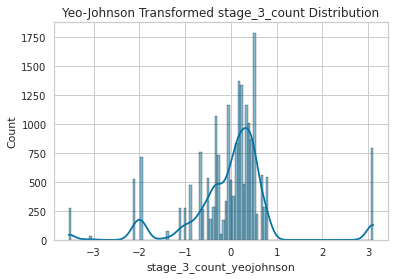

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


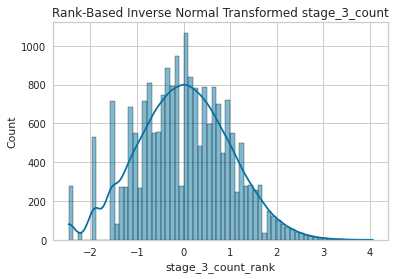

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'l

Original: p-value = 9.862654686694987e-132
Log: p-value = 1.5155702081707344e-124
Yeo-Johnson: p-value = 4.7831874748674063e-88
Rank-Based Inverse Normal: p-value = 6.163294623320723e-18
Standardized: p-value = 9.862654666382586e-132


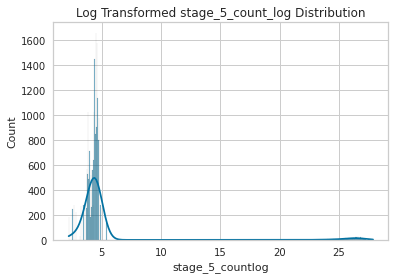

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:25: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_log = shapiro(df[feature+'log'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)


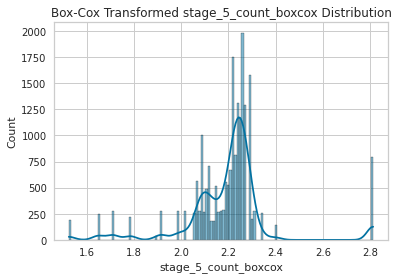

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])


Box-Cox: p-value = 2.1358319937465452e-94


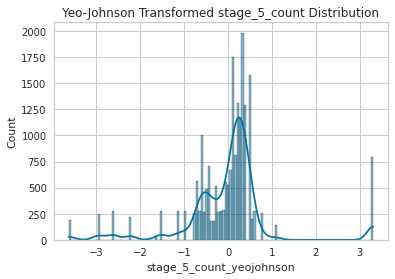

/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))


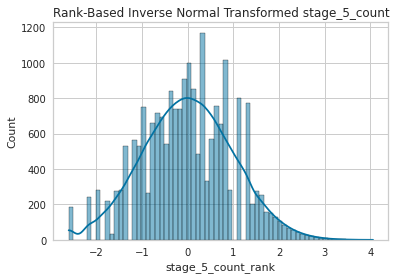

Original: p-value = 9.862654884144396e-132
Log: p-value = 1.7125794010660745e-126
Yeo-Johnson: p-value = 2.135835237216546e-94
Rank-Based Inverse Normal: p-value = 1.0147012759689161e-14
Standardized: p-value = 9.862654666382586e-132


/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:61: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_original = shapiro(df[feature])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:66: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
/dev/shm/jobs/48716073/ipykernel_5979/1915792136.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20369.
  _, p_value_rank = shapiro(df[feature+'_rank'])


In [59]:
p_values = {
    'feature': [],
    'original': [],
    'log': [],
    'boxcox': [],
    'yeojohnson': [],
    'rank': []
}

for feature in sleep_features:
    if 'stage_' not in feature:
        print(f'plotting for {feature}')
        sns.histplot(df[feature], kde=True)
        plt.title(f'Original {feature} Distribution')
        plt.savefig(f'skewness_tests/Original {feature} Distribution.svg')
        plt.show()
        
        
    if 'onset' not in feature:
        df[feature+'log'] = np.log(df[feature] + 1)
        sns.histplot(df[feature+'log'], kde=True)
        plt.title(f'Log Transformed {feature}_log Distribution')
        plt.savefig(f'skewness_tests/Log Transformed {feature}_log Distribution.svg')
        plt.show()
        _, p_value_log = shapiro(df[feature+'log'])
        p_values['log'].append(p_value_log)
        
        df[feature+'_boxcox'], _ = boxcox(df[feature] + 1)
        sns.histplot(df[feature+'_boxcox'], kde=True)
        plt.title(f'Box-Cox Transformed {feature}_boxcox Distribution')
        plt.savefig(f'skewness_tests/Box-Cox Transformed {feature}_boxcox Distribution.svg')
        plt.show()
        
        _, p_value_boxcox = shapiro(df[feature+'_boxcox'])
        print(f'Box-Cox: p-value = {p_value_boxcox}')
        p_values['boxcox'].append(p_value_boxcox)
        
    
    
    
    
    
    

    
    pt = PowerTransformer(method='yeo-johnson')
    df[feature+'_yeojohnson'] = pt.fit_transform(df[[feature]])
    sns.histplot(df[feature+'_yeojohnson'], kde=True)
    plt.title(f'Yeo-Johnson Transformed {feature} Distribution')
    plt.savefig(f'skewness_tests/Yeo-Johnson Transformed {feature} Distribution.svg')
    plt.show()
    
    ranks = rankdata(df[feature])
    df[feature+'_rank'] = norm.ppf((ranks - 0.5) / len(ranks))
    sns.histplot(df[feature+'_rank'], kde=True)
    plt.title(f'Rank-Based Inverse Normal Transformed {feature}')
    plt.savefig(f'skewness_tests/Rank-Based Inverse Normal Transformed {feature}.svg')
    plt.show()
    
    
    _, p_value_original = shapiro(df[feature])
    
    
    
    
    _, p_value_yeojohnson = shapiro(df[feature+'_yeojohnson'])
    _, p_value_rank = shapiro(df[feature+'_rank'])
    p_values['feature'].append(feature)
    p_values['original'].append(p_value_original)
    
    
    
    p_values['yeojohnson'].append(p_value_yeojohnson)
    p_values['rank'].append(p_value_rank)
    
    if 'onset' in feature:
        p_values['log'].append(np.nan)
        p_values['boxcox'].append(np.nan)
        
        
    
    print(f'Original: p-value = {p_value_original}')
    print(f'Log: p-value = {p_value_log}')
    
    print(f'Yeo-Johnson: p-value = {p_value_yeojohnson}')
    print(f'Rank-Based Inverse Normal: p-value = {p_value_rank}')
    print(f'Standardized: p-value = {p_value_standardized}')
                
    
            
    
        



        
    
    
    
    
    

    
# Original Data
# Convert dictionary to DataFrame
p_values_df = pd.DataFrame(p_values)

# Save DataFrame to CSV file
p_values_df.to_csv('skewness_tests/p_values.csv', index=False)

    

In [60]:
p_values_df

,feature,original,log,boxcox,yeojohnson,rank
0,total_sleep_time,3.767404e-130,2.114058e-110,2.167556e-100,2.167555e-100,7.903490e-16
1,percent_time_asleep,2.424936e-125,1.734616e-108,1.253891e-97,1.253891e-97,6.267270e-26
2,waso,3.457614e-43,2.848382e-76,3.699471e-43,3.699472e-43,9.700056e-13
3,sleep_onset_latency,7.096842e-106,NaN,NaN,8.265149e-80,3.344637e-01
4,number_wake_bouts,2.978069e-36,5.888600e-88,1.647255e-36,1.647258e-36,9.778579e-23
5,stage_0_count,9.862655e-132,1.802488e-126,3.794279e-107,3.794278e-107,4.038810e-13
6,stage_1_count,9.862655e-132,4.962907e-126,5.339010e-106,5.339011e-106,2.401250e-13
7,stage_2_count,9.862655e-132,9.690866e-126,1.023196e-107,1.023196e-107,1.789949e-15
8,stage_3_count,9.862655e-132,1.515570e-124,4.783187e-88,4.783187e-88,6.163295e-18
9,stage_5_count,9.862655e-132,1.712579e-126,2.135832e-94,2.135835e-94,1.014701e-14


Looking at the graphs above it appears that most suited transformations are 
| Feature                          | Original | Log Transformation | Box-Cox Transformation | Yeo-Johnson Transformation | Rank-Based Inverse Normal Transformation |
|----------------------------------|----------|---------------------|------------------------|----------------------------|------------------------------------------|
| total_sleep_time                 | ✖        | ✔                   | ✖                      | ✖                          | ✔                                        |
| percent_time_asleep              | ✖        | ✔                   | ✖                      | ✖                          | ✔                                        |
| waso                             | ✔        | ✖                   | ✖                      | ✖                          | ✖                                        |
| sleep_onset_latency              | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| number_wake_bouts                | ✔        | ✖                   | ✖                      | ✖                          | ✖                                        |
| stage_0_count                    | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| stage_1_count                    | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| stage_2_count                    | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| stage_3_count                    | ✖        | ✖                   | ✖                      | ✔                          | ✖                                        |
| stage_5_count                    | ✖        | ✖                   | ✖                      | ✔                          | ✖                                        |



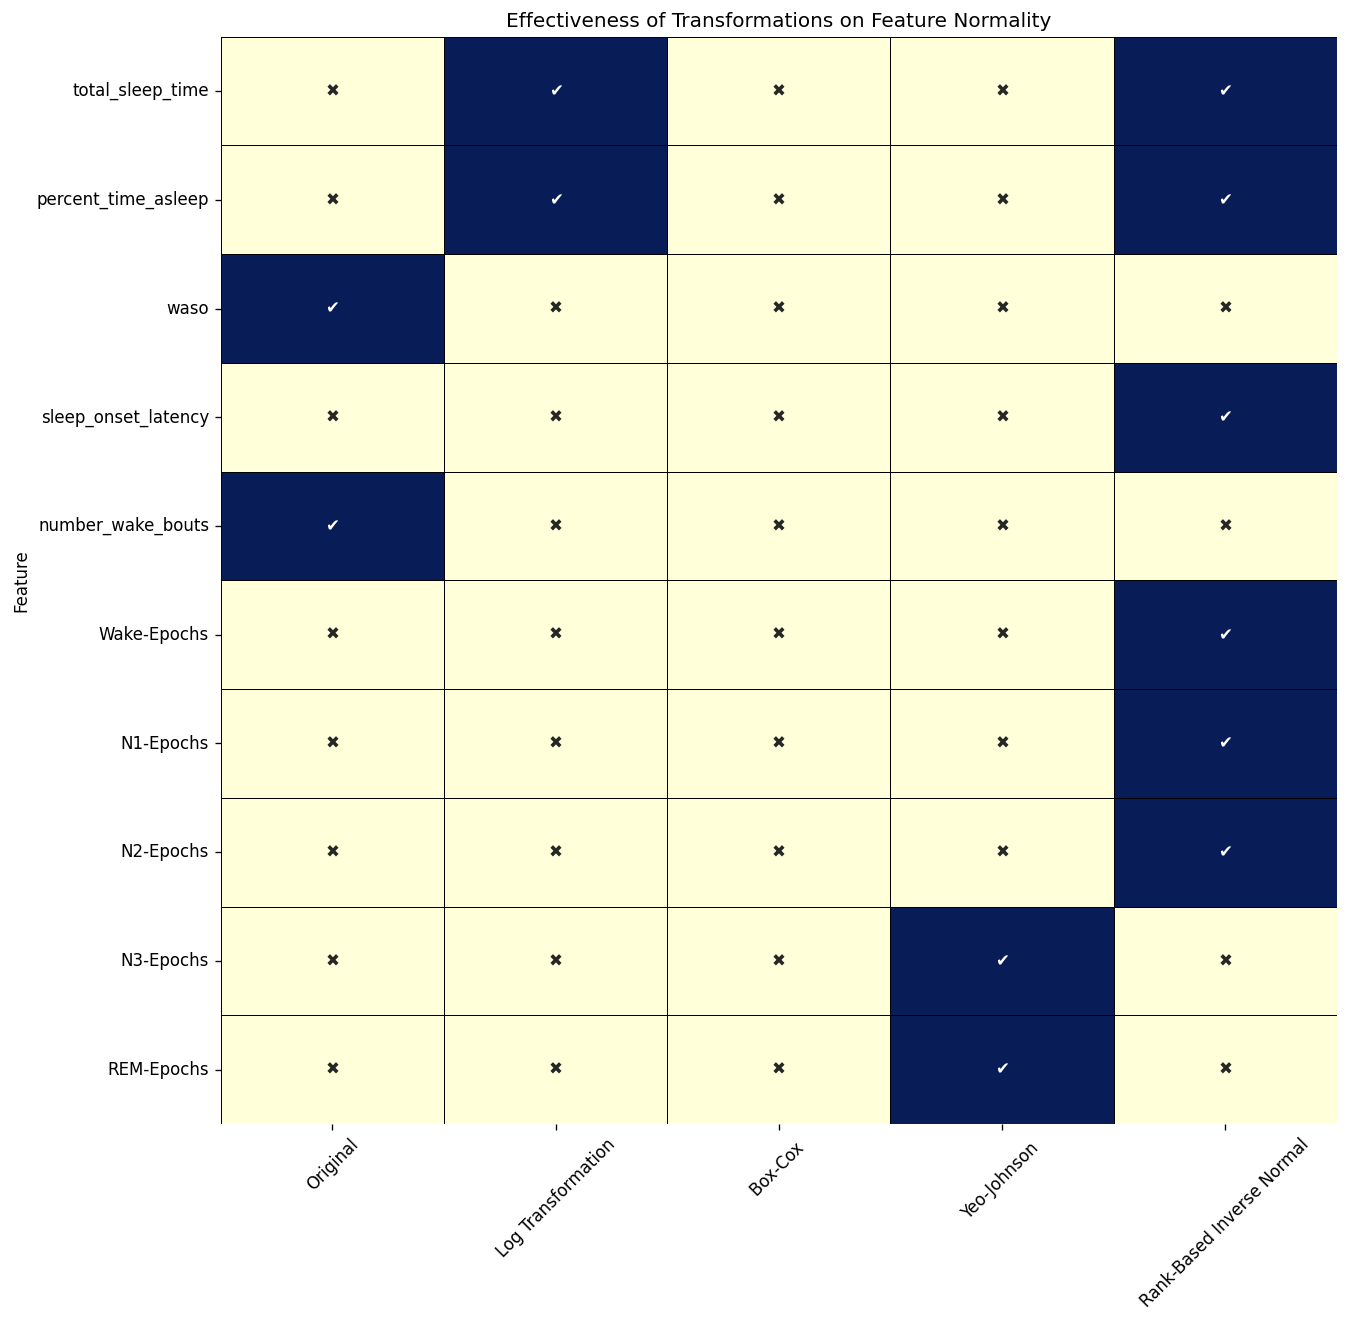

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the transformation results
data = {
    'Feature': ['total_sleep_time', 'percent_time_asleep', 'waso', 'sleep_onset_latency', 
                'number_wake_bouts', 'Wake-Epochs', 'N1-Epochs', 'N2-Epochs', 
                'N3-Epochs', 'REM-Epochs'],
    'Original': ['✖', '✖', '✔', '✖', '✔', '✖', '✖', '✖', '✖', '✖'],
    'Log Transformation': ['✔', '✔', '✖', '✖', '✖', '✖', '✖', '✖', '✖', '✖'],
    'Box-Cox ': ['✖', '✖', '✖', '✖', '✖', '✖', '✖', '✖', '✖', '✖'],
    'Yeo-Johnson ': ['✖', '✖', '✖', '✖', '✖', '✖', '✖', '✖', '✔', '✔'],
    'Rank-Based Inverse Normal': ['✔', '✔', '✖', '✔', '✖', '✔', '✔', '✔', '✖', '✖']
}

df_transformations = pd.DataFrame(data)
df_transformations.set_index('Feature', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 12),dpi=120)
sns.heatmap(df_transformations.applymap(lambda x: 1 if x == '✔' else 0), 
            cmap='YlGnBu', annot=df_transformations, fmt='', 
            cbar=False, linewidths=0.5, linecolor='black')

plt.title('Effectiveness of Transformations on Feature Normality')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('transformations.tiff')

plt.show()


In [70]:
flast_43_columns.columns

Index(['stage_0_count_log', 'total_sleep_time_log', 'percent_time_asleep_log',
       'stage_0_count_boxcox', 'stage_0_count_yeojohnson',
       'stage_0_count_rank', 'stage_0_count_standardized',
       'total_sleep_timelog', 'percent_time_asleeplog', 'wasolog',
       'sleep_onset_latencylog', 'number_wake_boutslog', 'stage_0_countlog',
       'stage_1_countlog', 'stage_2_countlog', 'stage_3_countlog',
       'stage_5_countlog', 'total_sleep_time_boxcox',
       'total_sleep_time_yeojohnson', 'total_sleep_time_rank',
       'percent_time_asleep_boxcox', 'percent_time_asleep_yeojohnson',
       'percent_time_asleep_rank', 'waso_boxcox', 'waso_yeojohnson',
       'waso_rank', 'sleep_onset_latency_yeojohnson',
       'sleep_onset_latency_rank', 'number_wake_bouts_boxcox',
       'number_wake_bouts_yeojohnson', 'number_wake_bouts_rank',
       'stage_1_count_boxcox', 'stage_1_count_yeojohnson',
       'stage_1_count_rank', 'stage_2_count_boxcox',
       'stage_2_count_yeojohnson', 'stage

In [71]:
flast_43_columns = df.iloc[:, -43:]
flast_43_columns
cols=['total_sleep_time_log','percent_time_asleep_log','waso','sleep_onset_latency_rank',
      'number_wake_bouts','stage_0_count_rank','stage_1_count_rank','stage_2_count_rank',
      'stage_3_count_yeojohnson','stage_5_count_yeojohnson']
      

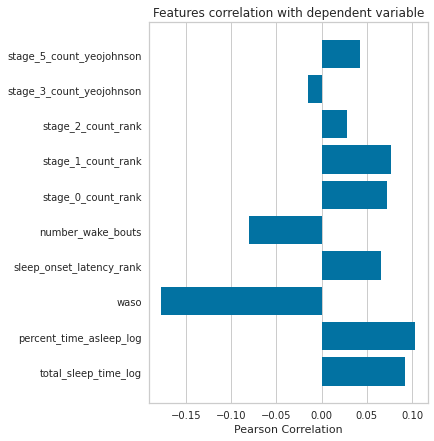

In [72]:
plt.figure(figsize=(5, 7))
visualizer = FeatureCorrelation(labels=cols)
visualizer.fit(df[cols], df['IG'])
visualizer.show(outpath="sleep_feature_correlation_initial.svg")
plt.show()

In [74]:
sleep_stages = ['stage_0_count', 'stage_1_count', 'stage_2_count', 'stage_3_count', 'stage_5_count']

# Calculate the total sleep time for each row
df['total_sleep_time'] = df[sleep_stages].sum(axis=1)

# Calculate the percentage for each sleep stage and add it as a new column
for stage in sleep_stages:
    df[stage + '_percent'] = (df[stage] / df['total_sleep_time']) * 100

# Display the DataFrame with the new percentage columns
df

/dev/shm/jobs/48716073/ipykernel_5979/1364386576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sleep_time'] = df[sleep_stages].sum(axis=1)
/dev/shm/jobs/48716073/ipykernel_5979/1364386576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage + '_percent'] = (df[stage] / df['total_sleep_time']) * 100


,IG,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,EDA_Std,...,stage_3_count_yeojohnson,stage_3_count_rank,stage_5_count_boxcox,stage_5_count_yeojohnson,stage_5_count_rank,stage_0_count_percent,stage_1_count_percent,stage_2_count_percent,stage_3_count_percent,stage_5_count_percent
0,97.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,0.334533,0.015065,...,0.105510,-0.096383,2.068073,-0.703572,-1.201861,11.809524,16.952381,50.095238,13.333333,7.809524
1,95.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,0.394727,0.018376,...,0.105510,-0.096383,2.068073,-0.703572,-1.201861,11.809524,16.952381,50.095238,13.333333,7.809524
2,92.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,0.458762,0.018286,...,0.105510,-0.096383,2.068073,-0.703572,-1.201861,11.809524,16.952381,50.095238,13.333333,7.809524
3,89.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,1.456508,0.069042,...,0.105510,-0.096383,2.068073,-0.703572,-1.201861,11.809524,16.952381,50.095238,13.333333,7.809524
4,90.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,5.904090,1.911557,...,0.105510,-0.096383,2.068073,-0.703572,-1.201861,11.809524,16.952381,50.095238,13.333333,7.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,174.0,83.044585,87.05,1.797977,0.482883,82.291102,83.831879,0.570997,0.596047,0.004867,...,3.104690,1.838875,2.812600,3.302293,1.838875,42.967995,34.364789,12.699175,9.193370,0.774671
21760,181.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,0.566582,0.004439,...,3.105679,1.867659,2.812661,3.302622,1.867659,42.967995,34.364789,12.699175,9.193370,0.774671
21761,177.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,0.538398,0.005217,...,3.105842,1.877607,2.812671,3.302674,1.877607,42.967995,34.364789,12.699175,9.193370,0.774671
21763,166.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,0.516619,0.003153,...,3.106892,1.969054,2.812732,3.303003,1.969054,42.967995,34.364789,12.699175,9.193370,0.774671


In [76]:
sleep_perc_cols=[val+'_percent' for val in sleep_stages]

In [77]:
sleep_perc_cols

['stage_0_count_percent',
 'stage_1_count_percent',
 'stage_2_count_percent',
 'stage_3_count_percent',
 'stage_5_count_percent']

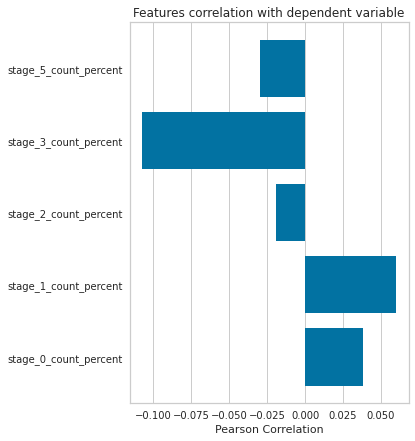

In [78]:
plt.figure(figsize=(5, 7))
visualizer = FeatureCorrelation(labels=sleep_perc_cols)
visualizer.fit(df[sleep_perc_cols], df['IG'])
visualizer.show(outpath="sleep_feature_correlation_initial_sleep_percentage.svg")
plt.show()

In [79]:
recommended_percentages = {
    'stage_1_count_percent': 7.5,  # average of 5-10%
    'stage_2_count_percent': 50,   # average of 45-55%
    'stage_3_count_percent': 18,   # average of 13-23%
    'stage_5_count_percent': 22.5  # average of 20-25%
}


In [80]:
for stage, recommended in recommended_percentages.items():
    df[stage + '_diff_from_recommended'] = df[stage] - recommended


/dev/shm/jobs/48716073/ipykernel_5979/971708171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage + '_diff_from_recommended'] = df[stage] - recommended
/dev/shm/jobs/48716073/ipykernel_5979/971708171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage + '_diff_from_recommended'] = df[stage] - recommended
/dev/shm/jobs/48716073/ipykernel_5979/971708171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [88]:
df.columns

Index(['IG', 'HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G', 'HR_Q3G',
       'EDA_Mean', 'EDA_Max', 'EDA_Std',
       ...
       'stage_5_count_rank', 'stage_0_count_percent', 'stage_1_count_percent',
       'stage_2_count_percent', 'stage_3_count_percent',
       'stage_5_count_percent', 'stage_1_count_percent_diff_from_recommended',
       'stage_2_count_percent_diff_from_recommended',
       'stage_3_count_percent_diff_from_recommended',
       'stage_5_count_percent_diff_from_recommended'],
      dtype='object', length=156)

In [89]:
sleep_perc_cols=['stage_1_count_percent_diff_from_recommended','stage_2_count_percent_diff_from_recommended',
                 'stage_3_count_percent_diff_from_recommended','stage_5_count_percent_diff_from_recommended']

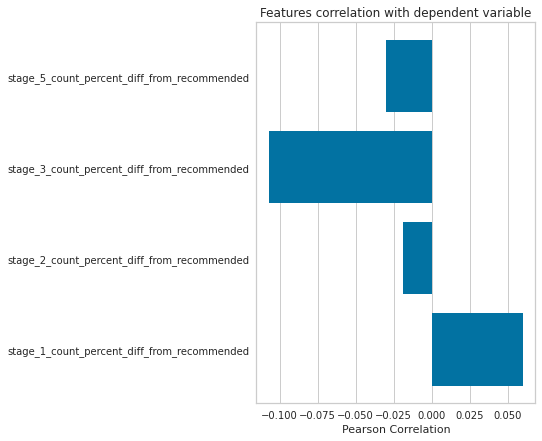

In [90]:
plt.figure(figsize=(5, 7))
visualizer = FeatureCorrelation(labels=sleep_perc_cols)
visualizer.fit(df[sleep_perc_cols], df['IG'])
visualizer.show(outpath="sleep_feature_correlation_initial_sleep_percentage.svg")
plt.show()

In [93]:
df.to_csv('data_compiled.csv')